# Mall_Customers

### Problem statement for K-means Clustering
Customer segmentation is the process of dividing customers into groups based on common characteristics so that companies can market to each group effectively and appropriately. Segmentation allows marketers to better tailor their marketing efforts to different categories of audiences. K-means clustering is effectively used to handle customer segmentation.  

The manager of the XYZ mall has approached us with this data where he has tried gathering some details regarding the customers who visit the mall. The given dataset is a simple spreadsheet where you can see columns like customer ID, gender of the customer, age of the customer, the annual income of the customer given to us in thousand dollars and the spending score which ranges from 1 to 100. The gender, age, and annual income was gathered through a feedback survey and the spending score was calculated by the manager on the basis of several factors like how often does the customer visit the mall, how much of amount does he spend on shopping and also on entertainment and food. Based on this, from the manager’s perspective, a good spending score which is close to 100 indicates a good customer and spending score close to 1 indicates a bad customer.  

Now the manager has come up to us with this data saying that he has an offer in his mind which he wants to roll out to specific customers by personally calling them. Since the data in the real world is huge, this cannot be done manually, since the manager cannot call each and every customer. So what we can do is apply K-means clustering algorithm to find out the potential customers for the manager so that he can call only those specific customers and roll out the offer to them.  

You are required to work upon this data and find out the optimum number of segments that can be generated, segment the customers and help the manager with the potential customers.

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
import os

# Display options
pd.set_option("display.max_rows", None)

In [2]:
# Importing the dataset
df = pd.read_csv(r"Mall_Customers.csv", index_col=0, header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
# Checking the shape
df.shape

(200, 4)

In [4]:
# Checking the data types
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [5]:
# Checking description
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [6]:
# Checking statistical information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [7]:
# Checking for null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# Checking for duplicate values
df.duplicated().sum()

0

* We see that we have 200 rows and 4 columns.
* There are no null values.
* There are no duplicates.
* In Gender column, the mode is "Female".
* Range of Age is 18 - 70.
* Range od 'Annual Income is 15 - 137.
* Data type for:
    * Gender is object(Categorical). 
    * 3 features ('Age', 'Annual Income', 'Spendingscore (1-100)') is int.

In [9]:
df["Gender"] = df["Gender"].map({"Female":0, "Male":1})
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [10]:
# Creating X(Independent variables)
# K-Means only required the Independent variables and not the Dependent/target variables.

X = df.values[:, [2,3]]

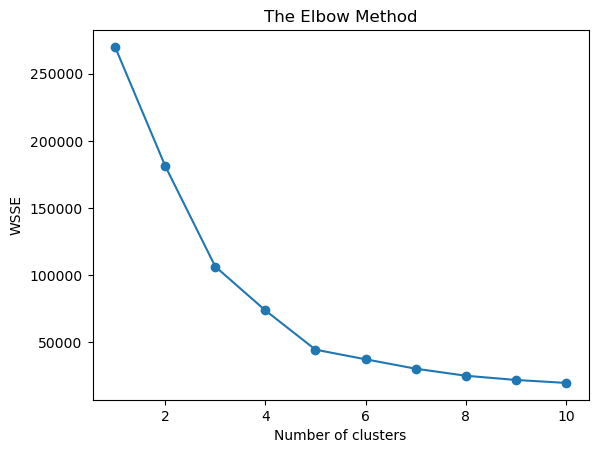

In [11]:
# Using the elbow method to find the optimal number of clusters

#from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wsse)

plt.scatter(range(1, 11),wsse)

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [12]:
print(wsse)

[269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37271.8862365895, 30273.39431207004, 25022.485004530357, 21881.878507060967, 19669.710998301212]


We see graphically and by printing wsse, that the optimum K value is 5

In [13]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

#kmeans.fit(X) --> training
#Y_pred = kmeans.predict(X) --> predicting

In [14]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [15]:
kmeans.inertia_

44448.45544793371

In [16]:
kmeans.n_iter_

5

In [17]:
df["Clusters"] = Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,1,19,15,39,3
2,1,21,15,81,0
3,0,20,16,6,3
4,0,23,16,77,0
5,0,31,17,40,3
6,0,22,17,76,0
7,0,35,18,6,3
8,0,23,18,94,0
9,1,64,19,3,3


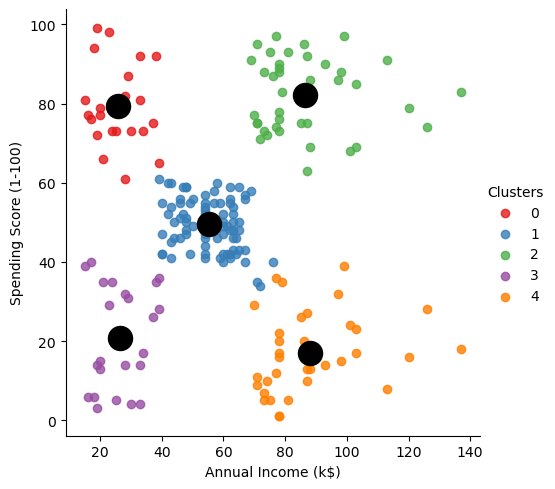

In [18]:
# Plotting clusters graphically using spending scores and Annual Income.

sns.lmplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='Clusters',palette="Set1")  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black') # Used to show centroids
    
plt.show()

* Cluster 0: Earns less but spends alot.
    * "Careless"
* Cluster 1: Average Customer (Earns and spends average)
    * "Standard"
* Cluster 2: Ideal Customers (Earns and spends alot)
    * "Target"
* Cluster 3: Poor Customers (Earns and spends less)
    * "Sensible"
* Cluster 4: Careful Customers (Earns alot but spends less) Kanjoos
    * "Careful"

In [19]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [20]:
df["Clusters"] = df.Clusters.replace({0: "Careless",
                                     1: "Standard",
                                     2: "Target",
                                     3: "Sensible",
                                     4: "Careful"})

In [21]:
#pd.set_option("display.max_rows", None)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,1,19,15,39,Sensible
2,1,21,15,81,Careless
3,0,20,16,6,Sensible
4,0,23,16,77,Careless
5,0,31,17,40,Sensible


In [22]:
# Creating a new DataFrame with our Target customers
new_df = df[df["Clusters"] == "Target"]
new_df.shape

(39, 5)

In [23]:
new_df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
124,1,39,69,91,Target
126,0,31,70,77,Target
128,1,40,71,95,Target
130,1,38,71,75,Target
132,1,39,71,75,Target
134,0,31,72,71,Target
136,0,29,73,88,Target
138,1,32,73,73,Target
140,0,35,74,72,Target


In [24]:
# Dumping Target Customers data to an excel file.
new_df.to_excel(r"TargetCustomers.xlsx", index=True)